<a href="https://colab.research.google.com/github/sgnk/colab/blob/master/mnist_3layer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow
from tensorflow import keras

In [0]:
tensorflow.test.gpu_device_name()

'/device:GPU:0'

In [0]:
%matplotlib inline

In [0]:
import matplotlib.pyplot as plt

In [0]:
batch_size = 128
num_class = 10
epochs = 20

In [0]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [0]:
len(x_train)

60000

In [0]:
x_train[0:10]

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [0]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [0]:
len(x_test)

10000

In [0]:
len(y_test)

10000

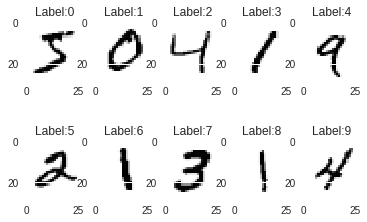

In [0]:
for i in range(10):
  plt.subplot(2, 5, i+1)
  plt.title("Label:" + str(i))
  plt.imshow(x_train[i].reshape(28,28), cmap=None)

In [0]:
y_train[0:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [0]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [0]:
model = keras.models.Sequential([
  keras.layers.Flatten(),
  keras.layers.Dense(512, activation='relu'),
  keras.layers.Dropout(0.2),
  keras.layers.Dense(10, activation='softmax')
])

In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 9s 149us/step - loss: 0.2033 - acc: 0.9398
Epoch 2/5
60000/60000 [==============================] - 9s 142us/step - loss: 0.0806 - acc: 0.9749
Epoch 3/5
60000/60000 [==============================] - 8s 141us/step - loss: 0.0517 - acc: 0.9836
Epoch 4/5
60000/60000 [==============================] - 8s 140us/step - loss: 0.0372 - acc: 0.9881
Epoch 5/5
60000/60000 [==============================] - 8s 140us/step - loss: 0.0265 - acc: 0.9914


In [0]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 63us/step


[0.06633129415885487, 0.9807]

In [95]:
y_test[0:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

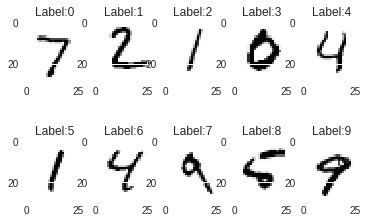

In [97]:
for i in range(10):
  plt.subplot(2, 5, i+1)
  plt.title("Label:" + str(i))
  plt.imshow(x_test[i].reshape(28,28), cmap=None)

In [98]:
model.predict(x_test[0:10])

array([[1.45625387e-10, 1.35843975e-10, 2.84445782e-08, 7.93478830e-05,
        4.22482904e-13, 4.23665334e-08, 5.34903393e-13, 9.99918699e-01,
        1.41996210e-08, 1.93138044e-06],
       [2.15726811e-10, 5.87828254e-07, 9.99999285e-01, 7.06231829e-09,
        6.77961068e-17, 3.22066085e-09, 7.04174496e-11, 1.65144089e-13,
        1.36193435e-07, 9.35065251e-15],
       [4.38233513e-07, 9.96451497e-01, 5.14497879e-05, 1.21699384e-06,
        4.45508012e-05, 3.78811092e-06, 5.41756053e-05, 5.30426798e-04,
        2.86239875e-03, 7.53117320e-08],
       [9.99997020e-01, 2.35423434e-11, 5.19099331e-07, 4.38318537e-09,
        7.07769787e-10, 9.37427345e-08, 2.06218078e-06, 2.71703044e-07,
        1.55315227e-09, 1.43361348e-07],
       [7.96103947e-08, 7.89790722e-09, 3.06909023e-08, 4.59399718e-09,
        9.97665882e-01, 1.09225962e-08, 1.22773156e-06, 3.75794048e-06,
        8.97898218e-08, 2.32898421e-03],
       [6.20717131e-08, 9.99560535e-01, 6.72640539e-08, 2.51193590e-08,
   